### What is Deep Learning

It is subfield of machine learning (learn from the data). All algorithms are based on the neural networks

Neural n/w or ANN is an interconnected group of nodes, which process data similar to human brain network

<img src="images/dl.png">

### An Neural Network  is an interconnected group of nodes, which process data similar to the our brain network.

<img src='images/dnn.jpeg'>

<img src="images/nnb.png">

### Artificial neural network (ANN) is inspired by the human neural network architecture. The simplest neural network consists of only one neuron and is called a perceptron

### An Artificial Neural Network (ANN) is a computational model that is inspired by the way biological neural networks in the human brain process information.

- The basic unit of computation in a neural network is the neuron, often called a node or unit. 


- It receives input from some other nodes, or from an external source and computes an output.


- Each input has an associated weight (w), which is assigned on the basis of its relative
  importance to other inputs.


- The node applies a function f  to the weighted sum of its inputs 

### Types of ANN 

- Single layer NN (Perceptron)
- Multi-Layer Neural Network

### Single-layer Neural Network (Perceptron)

#### The Perceptron algorithm is the simplest type of artificial neural network, it is inspired by the information processing of a single neural cell called a neuron.

<img src='images/perceptron-picture.png' width='60%'/>

In [ ]:
# 100*1 = 100
# 100*0.5 = 50
# 100*0 = 0

A perceptron has a input layer and a neuron. Input layer is responsible for receiving the inputs.

Each input is multiplied with a weight  and the results are added together.


The sum is then passed through an activation function.


Activation Function(may be a non-linear function) takes the sum of weighted input (w1*x1 + w2*x2 + w3*x3 + 1*b) as an argument and return the output of the neuron. 

### Activation Functions

### 1:Sigmoid or Logistic Function

It exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.

<img src="images/sig.PNG" width='40%'/>

### Tanh or hyperbolic tangent Activation Function

- tanh is also like logistic sigmoid but range of the tanh function is from (-1 to 1).

<img src="images/tanh.png" width='50%'/>

<img src="images/tan.PNG" width='50%'/>


### ReLU function :Rectified linear unit

- Most widely used activation function.

-  It gives an output x if x is positive and 0 otherwise.

<img src="images/relu.png" width='80%'/>

### Implementing Perceptron in scikit-learn

In [3]:
from sklearn.datasets import load_iris, load_digits
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [6]:
X = mnist.data
y = mnist.target

In [7]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [9]:
import matplotlib.pyplot as plt

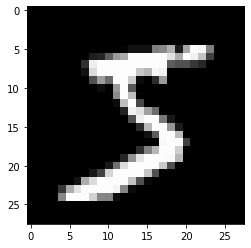

In [10]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.show()

In [11]:
y[0]

'5'

### Split data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=10000,
                                               random_state=10)

In [13]:
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


### Scale data

In [14]:
sc = StandardScaler()

In [15]:
x_train_sc = sc.fit_transform(xtrain)
x_test_sc = sc.transform(xtest)

### Perceptron Hyperparaeters

#eta: Learning Rate
#Learning Rate is used to limit the amount each weight's contribution (each time it is updated)

#n_iter: (Epochs) : The number of times to run through the training data while updating the weight

In [16]:
ptron = Perceptron(penalty='l1', max_iter=40, eta0=.001, random_state=10)

In [17]:
ptron.fit(x_train_sc, ytrain)

Perceptron(eta0=0.001, max_iter=40, penalty='l1', random_state=10)

In [20]:
pred = ptron.predict(x_test_sc)

In [21]:
ptron.score(x_train_sc, ytrain)

0.89375

In [22]:
accuracy_score(ytest, pred)

0.8819

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train_sc, ytrain)
print("Training: ", log.score(x_train_sc, ytrain))
print("Testing: ", log.score(x_test_sc, ytest))

C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training:  0.9425
Testing:  0.9153


## Multilayer Perceptron

The multilayer perceptron (MLP) 

- is a feedforward artificial neural network model that maps sets of input
  data onto a set of appropriate outputs.
  
  
- consists of multiple layers 
  an input and an output layer with one or more hidden layers


- the input layer, consists of a set of features.


- Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation w_1x_1 + w_2x_2 + ... + w_mx_m, followed by a non-linear activation function..


- The output layer receives the values from the last hidden layer and
  transforms them into output values.


- MLPs are fully connected, each node in one layer connects with a certain
  weight to every node in the following layer.


-  The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. 


- There can be one or more non-linear hidden layers between the input and the output layer.

<img src="images/mlp.png" width="80%"/>

In [24]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(100,100), max_iter=40,solver="sgd",verbose=True)

In [28]:
mlp.fit(x_train_sc, ytrain)

Iteration 1, loss = 1.10946929
Iteration 2, loss = 0.45159023
Iteration 3, loss = 0.34025062
Iteration 4, loss = 0.28929748
Iteration 5, loss = 0.25741470
Iteration 6, loss = 0.23442340
Iteration 7, loss = 0.21655138
Iteration 8, loss = 0.20206961
Iteration 9, loss = 0.18995366
Iteration 10, loss = 0.17960769
Iteration 11, loss = 0.17065164
Iteration 12, loss = 0.16269770
Iteration 13, loss = 0.15553245
Iteration 14, loss = 0.14913948
Iteration 15, loss = 0.14328546
Iteration 16, loss = 0.13783682
Iteration 17, loss = 0.13289727
Iteration 18, loss = 0.12818035
Iteration 19, loss = 0.12401690
Iteration 20, loss = 0.12001575
Iteration 21, loss = 0.11614272
Iteration 22, loss = 0.11271343
Iteration 23, loss = 0.10929376
Iteration 24, loss = 0.10614004
Iteration 25, loss = 0.10320120
Iteration 26, loss = 0.10031494
Iteration 27, loss = 0.09760343
Iteration 28, loss = 0.09498898
Iteration 29, loss = 0.09255979
Iteration 30, loss = 0.09012877
Iteration 31, loss = 0.08794180
Iteration 32, los

C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=40, solver='sgd',
              verbose=True)

In [29]:
print("Training set Score: ",mlp.score(x_train_sc, ytrain))
print("Testing Score: ", mlp.score(x_test_sc, ytest))

Training set Score:  0.98075
Testing Score:  0.9601


In [ ]:
### Change Parameters (Increase no. of hiddn layers)

In [ ]:
# mlp1 = MLPClassifier(activation='relu', hidden_layer_sizes=(200,200,200), verbose=True,
#                     max_iter=40, solver="sgd", random_state=1, tol=.001)

In [30]:
print(mlp.loss_curve_)

[1.109469290475933, 0.45159022926381814, 0.340250623037759, 0.28929747721444665, 0.2574147023102258, 0.2344234024114287, 0.2165513768271859, 0.20206960958332718, 0.18995365658662886, 0.17960769409961713, 0.1706516401174699, 0.1626977005385553, 0.15553244518352516, 0.14913947732327407, 0.14328545526199934, 0.13783682253670168, 0.1328972703589485, 0.1281803530274254, 0.1240168993445873, 0.12001575229869668, 0.1161427224828823, 0.112713429010704, 0.10929376355387987, 0.10614003535993835, 0.10320120386348217, 0.10031493887471758, 0.09760342556776437, 0.0949889830450743, 0.09255979320005296, 0.09012877122245322, 0.08794179593053422, 0.08567569342704694, 0.08365599961608154, 0.08161013029962257, 0.07964020641597352, 0.07787107495367311, 0.07602853889415362, 0.07423620911938704, 0.07252823395438815, 0.07094256169238924]


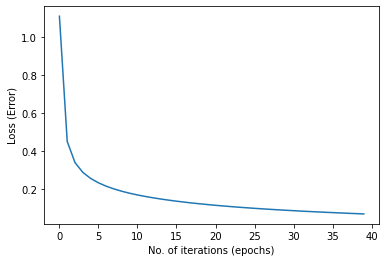

In [31]:
plt.plot(mlp.loss_curve_)
plt.xlabel("No. of iterations (epochs)")
plt.ylabel("Loss (Error)")
plt.show()

In [ ]:
### Evaluation on real data

(28, 28) 2


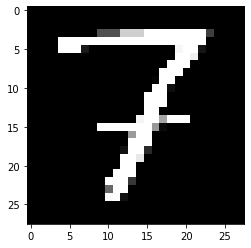

In [32]:
import cv2
img = cv2.imread('test.png',2)
img = cv2.resize(img, (28,28))
print(img.shape, img.ndim)
plt.imshow(img, cmap='gray')

In [33]:
tst = img.reshape(1,-1) #(1,784)
tst1 = sc.fit_transform(tst)
prediction = mlp.predict(tst1)
print(prediction)


['9']


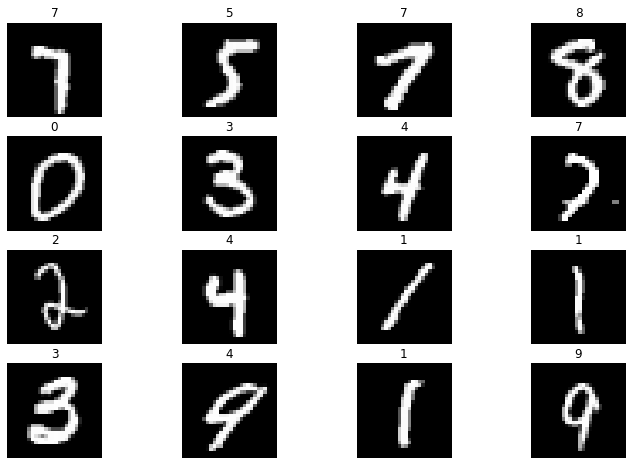

In [34]:
pred = mlp.predict(x_test_sc)
plt.figure(figsize=(12,8))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(xtest[i].reshape(28,28), cmap='gray')
    plt.title(pred[i])
    plt.axis('off')